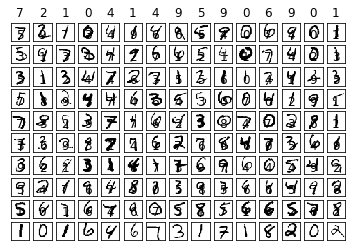

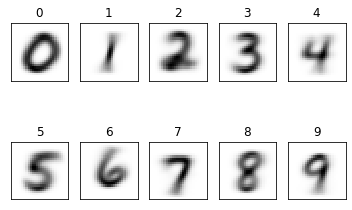

In [16]:
import matplotlib.pyplot as plt
import numpy as np

file_data   = "mnist.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)
count       = 0     # count for the number of images

#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

#
# make a matrix each column of which represents an images in a vector form
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label[count]       = label
    list_image[:, count]    = im_vector

    count += 1

#
# plot first 150 images out of 10,000 with their labels
#
f1 = plt.figure(1)

for i in range(150):

    label       = list_label[i]
    im_vector   = list_image[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(10, 15, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)


#plt.show()

#
# plot the average image of all the images for each digit
#
f2 = plt.figure(2)

im_average  = np.zeros((size_row * size_col, 10), dtype=float)
im_count    = np.zeros(10, dtype=int)

for i in range(num_image):

    im_average[:, list_label[i]] += list_image[:, i]
    im_count[list_label[i]] += 1

for i in range(10):

    im_average[:, i] /= im_count[i]

    plt.subplot(2, 5, i+1)
    plt.title(i)
    plt.imshow(im_average[:,i].reshape((size_row, size_col)), cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()


In [17]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))
print('Defined sigmoid function!')

Defined sigmoid function!


In [18]:
col_train_j = []
col_test_j = []
col_train_acc = []
col_test_acc = []

num_iter = 50
num_train = 6000
num_test = 4000

u = np.random.normal(0,1,[785,196])
v = np.random.normal(0,1,[197,49])
w = np.random.normal(0,1,[50,10])

for iteration in range(num_iter):
    
    sum_train_j = 0
    sum_test_j = 0
    sum_train_acc = 0
    sum_test_acc = 0
    
    for train in range(num_train):
    
        input_v = np.append(list_image[:,train],1)
        input_v = np.reshape(input_v, (-1, len(input_v)))
        
        actual_l = np.zeros(10)
        actual_l[list_label[train]] = 1
        
        y_ = input_v.dot(u)
        y = sigmoid(y_)
        y = np.reshape(np.append(y, 1), (-1, len(np.append(y,1))))
        
        z_ = y.dot(v)
        z = sigmoid(z_)
        z = np.reshape(np.append(z, 1), (-1, len(np.append(z,1))))
        
        h_ = z.dot(w)
        h = sigmoid(h_) 
        
        ###############################################       
        dl_dh = -actual_l/h + (1.0 - actual_l)/(1.0 - h)
        dl_dh = np.reshape(dl_dh,(-1,10))
        
        dh_dhh = sigmoid(h_)*(1 - sigmoid(h_))
        dh_dhh = np.reshape(dh_dhh,(-1,10))

        sigma = dl_dh*dh_dhh
        sigma = np.reshape(sigma,(10,-1))
        
        dl_dw = sigma.dot(z)
        dl_dw = np.transpose(dl_dw)

        w = w - 0.01*dl_dw
        
        ##############################################
        
        sigma_s = w.dot(sigma)  
        sigma_s = sigma_s[:-1]
        
        dz_dzz = sigmoid(z_)*(1 - sigmoid(z_))
        dz_dzz = np.reshape(dz_dzz,(49,-1))
        
        sigma_s_x_dz_dzz = sigma_s*dz_dzz

        dl_dv = sigma_s_x_dz_dzz.dot(y)
        dl_dv = np.transpose(dl_dv)

        v = v - 0.01*dl_dv
        
        ###############################################
        sigma_s1 = v.dot(sigma_s)
        sigma_s1 = sigma_s1[:-1]

        dy_dyy = sigmoid(y_)*(1 - sigmoid(y_))
        dy_dyy = np.reshape(dy_dyy,(196,-1))
 
        bb = sigma_s1*dy_dyy
 
        dl_du = bb.dot(input_v)
        dl_du = np.transpose(dl_du)
        
        u = u - 0.01*dl_du
        
        ###############################################
        sum_train_j += np.sum( -actual_l * np.log(h) - (1 - actual_l) * np.log(1 - h))

        output_l = np.zeros(10)
        output_l[np.argmax(h)] = 1

        dE_dh = actual_l - output_l

        if np.sum(dE_dh**2) == 0:
            sum_train_acc += 1
        
    for test in range(num_train + 1, num_train + num_test):
    
        input_v = np.append(list_image[:,test],1)
        input_v = np.reshape(input_v, (-1, len(input_v)))
        
        actual_l = np.zeros(10)
        actual_l[list_label[test]] = 1
        
        y_ = input_v.dot(u)
        y = sigmoid(y_)
        y = np.reshape(np.append(y, 1), (-1, len(np.append(y,1))))
        
        z_ = y.dot(v)
        z = sigmoid(z_)
        z = np.reshape(np.append(z, 1), (-1, len(np.append(z,1))))
        
        h_ = z.dot(w)
        h = sigmoid(h_) 
               
        sum_test_j += np.sum( -actual_l * np.log(h) - (1 - actual_l) * np.log(1 - h))
        output_l = np.zeros(10)
        output_l[np.argmax(h)] = 1

        dE_dh = actual_l - output_l
        if np.sum(dE_dh**2) == 0:
            sum_test_acc += 1
          
    col_train_j.append(sum_train_j/num_train)
    col_test_j.append(sum_test_j/num_test)
    col_train_acc.append(sum_train_acc/num_train)
    col_test_acc.append(sum_test_acc/num_test)
      

print('Network trained!')

Network trained!


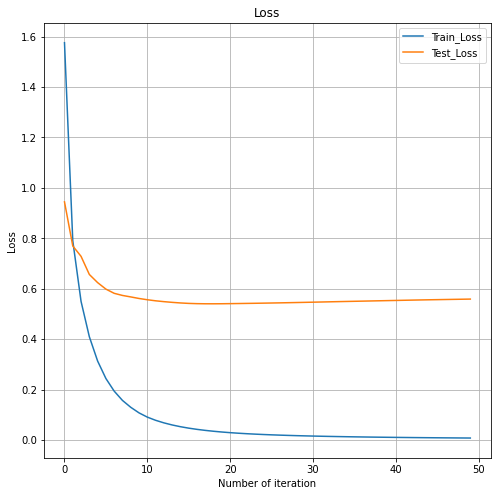

In [19]:
plt.figure(figsize=(8,8))
plt.plot(col_train_j)
plt.plot(col_test_j)
plt.title('Loss')
plt.legend(['Train_Loss','Test_Loss'])
plt.ylabel('Loss')
plt.xlabel('Number of iteration')

plt.grid()
plt.show()

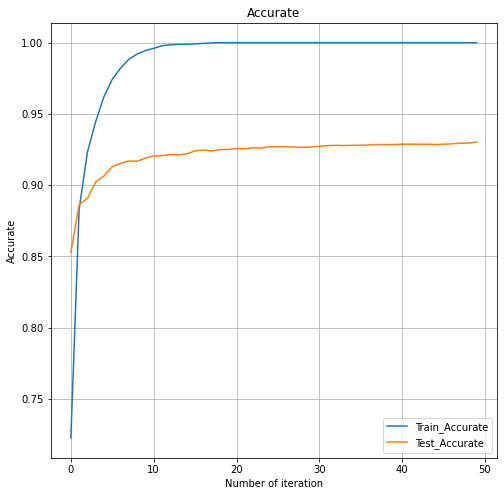


	 Training Accurate: 1.0000  Testing Accurate: 0.9303


In [20]:
plt.figure(figsize=(8,8))
plt.plot(col_train_acc)
plt.plot(col_test_acc)
plt.grid()
plt.title('Accurate')
plt.legend(['Train_Accurate','Test_Accurate'])
plt.ylabel('Accurate')
plt.xlabel('Number of iteration')

plt.show()

print()
print('\t Training Accurate: %.4f  Testing Accurate: %.4f' % (col_train_acc[-1], col_test_acc[-1]))